# Large Data Handling in Python Workshop
#### Instructor: Mahmood M. Shad | Associate Director of Research Software Engineering @FAS Research Computing 
#### Date: 06/07/2021

#### Resources:
- [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
- [Parallel Computing on FASRC CANNON Cluster](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)

## List of Topics
- Python Data Types: Collections
- File I/O
- Parallel Data Processing

### Python Data Types: Collections
#### List Comprehensions

In [1]:
# Build sequences from other sequences

l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%time res1 = [ x**2 for x in l if isinstance(x, int) ]

# x**2                       :: output expression
# x                          :: variable
# l                          :: input sequence
# if isinstance(x, int)      :: optional predicate


# NOTE: Same results by map, filter, lambda
# lambda(variable : equation, list)

%time res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


print(res1 == res2)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 12.9 µs
True


In [2]:
# %timeit vs %time
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%timeit res1 = [ x**2 for x in l if isinstance(x, int) ]
%timeit res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


2.15 µs ± 86.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.26 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%time

print("time the whole cell using %%time built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(res1 == res2)

time the whole cell using %%time built-in function
True
CPU times: user 254 µs, sys: 113 µs, total: 367 µs
Wall time: 334 µs


In [6]:
%%prun

print("time the whole cell using %%time built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(res1 == res2)

time the whole cell using %%time built-in function
True
 

**NOTE:** Read more about the built-in magic commands in `IPython` [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 

In [7]:
%load_ext snakeviz

In [8]:
def test():
    l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

    res1 = [ x**2 for x in l if isinstance(x, int) ]
    res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
    print(res1 == res2)

In [9]:
%snakeviz test()

True
 
*** Profile stats marshalled to file '/var/folders/_c/6tgj_rc57nv5066769brrsym0000gn/T/tmpg4ys64fe'. 
Embedding SnakeViz in this document...


In [10]:
%%time

# Nested Comprehensions
[ [ 1 if i == row_i else 0 for i in range(0, 10) ] for row_i in range(0, 10) ]

# Use zip() to work with two or more elements at a time
[(v,w) for v,w in zip([1,2,3], [4,5,6])]

CPU times: user 60 µs, sys: 3 µs, total: 63 µs
Wall time: 66 µs


[(1, 4), (2, 5), (3, 6)]

#### Set Comprehensions
Similar to list comprehensions but it outputs sets.

In [11]:
l = [1, 4, 9, 'aa', 0, 4, 'bb', 5, 5, 'aa', 'bb', 1]
res = {i for i in l}
print(res)

{0, 1, 4, 5, 9, 'bb', 'aa'}


#### Dictionary Comprehensions
Similar to list comprehensions but it outputs dictionaries.

In [12]:
# Get frequency of keys and ignore lowercase/uppercase
d = {'b':20, 'c': 40, 'B': 50, 'Z':30}

d_freq = { i.lower() : d.get(i.lower(), 0) + d.get(i.upper(), 0) for i in d.keys() }

print(d)
print(d_freq)

{'b': 20, 'c': 40, 'B': 50, 'Z': 30}
{'b': 70, 'c': 40, 'z': 30}


#### Function map(), apply(), applymap()

In [13]:
def xsq(x):
    return x**2

l1 = [i for i in range(10**5)]

%time list(map(xsq, l1))
%time list(map(lambda x: x**2, l1))


l2 = ['cat', 'dog', 'bird', 'horse']
print(list(map(list,l2)))

CPU times: user 33.4 ms, sys: 2.3 ms, total: 35.7 ms
Wall time: 35.2 ms
CPU times: user 30.9 ms, sys: 1.36 ms, total: 32.3 ms
Wall time: 32.2 ms
[['c', 'a', 't'], ['d', 'o', 'g'], ['b', 'i', 'r', 'd'], ['h', 'o', 'r', 's', 'e']]


In [14]:
# dataframe map
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
del df['species']

f = lambda x: x.max() - x.min()
format = lambda x: '%.2f' % x

# map() function
%time print ( pd.Series(map(format, df['sepal_length'])) ) 

# map works element-wise on a series
%time print( df['sepal_length'].map(format) )

# applymap works element-wise on a dataframe
%time print ( df.applymap(format) )

# apply works on row/column basis
%time print ( df.apply(f, axis=0) )    # 0: column, 1: row

0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Length: 150, dtype: object
CPU times: user 1.48 ms, sys: 79 µs, total: 1.56 ms
Wall time: 1.57 ms
0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Name: sepal_length, Length: 150, dtype: object
CPU times: user 1.34 ms, sys: 146 µs, total: 1.48 ms
Wall time: 1.45 ms
    sepal_length sepal_width petal_length petal_width
0           5.10        3.50         1.40        0.20
1           4.90        3.00         1.40        0.20
2           4.70        3.20         1.30        0.20
3           4.60        3.10         1.50        0.20
4           5.00        3.60         1.40        0.20
..           ...         ...          ...         ...
145         6.70        3.00         5.20        2.30
146         6.30        2.50         5.00        1.90
147         6.50        3.00     

Output()

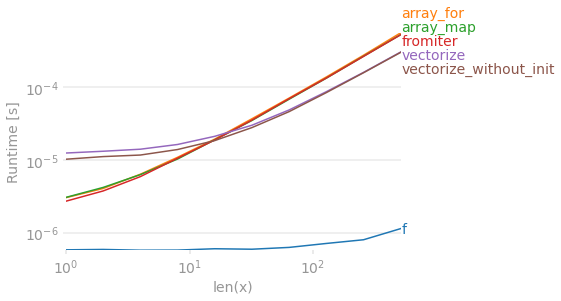

In [15]:
# Example on numpy array

import numpy as np
import perfplot
import math

def f(x):
    # return math.sqrt(x)
    return np.sqrt(x)

vf = np.vectorize(f)

def array_for(x):
    return np.array([f(xi) for xi in x])

def array_map(x):
    return np.array(list(map(f, x)))

def fromiter(x):
    return np.fromiter((f(xi) for xi in x), x.dtype)

def vectorize(x):
    return np.vectorize(f)(x)

def vectorize_without_init(x):
    return vf(x)

perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2 ** k for k in range(10)],
    kernels=[f, array_for, array_map, fromiter, vectorize, vectorize_without_init],
    xlabel="len(x)",
)

#### Iterators & Generators

In [16]:
# Iterators

l = [1, 20, 3, 40, 5, 60]
it = iter(l)

print( next(it) )
print( it.__next__() )

1
20


In [17]:
# Generators
import random

def lot():
    for i in range(4):
        yield random.randint(100, 200)

for r in lot():
       print("Next random number is: %d" %(r))

Next random number is: 172
Next random number is: 131
Next random number is: 178
Next random number is: 183


### I/O Operation
We want efficiency and flexibility in I/O operations!
- Pickle (serialized storage)
- I/O on Text
- SQL Database
- PyTables I/O Operations

#### Pickle :: Serialized storage

In [18]:
# pickle module serializes the python object for faster r/w.
import pickle
import numpy as np
from random import gauss

dat1 = [gauss(1.5, 2) for i in range(1000000)]

file = open("ser_data.pkl", 'wb')

# data variable is serialized to a "byte stream" and dumped to disk
%time pickle.dump(dat1, file)

# retrieving deserialized data from pickle file
%time dat2 = pickle.load(open( "ser_data.pkl", "rb" ))

np.allclose(np.array(dat1), np.array(dat2), rtol=1e-05, atol=1e-08)  # relative / absolute

CPU times: user 19.4 ms, sys: 7.57 ms, total: 26.9 ms
Wall time: 26.9 ms
CPU times: user 26.2 ms, sys: 13.2 ms, total: 39.4 ms
Wall time: 39.8 ms


True

In [19]:
%%time
with open('nonser_data.dat', 'w') as f:
    for item in dat1:
        f.write("%s\n" % item)

CPU times: user 801 ms, sys: 31.1 ms, total: 832 ms
Wall time: 852 ms


#### I/O on Text
Pandas library is preferred over built-in Python commands for text data processing.  
Formats: JSON, SQL, CSV, XLS/XLSX, HTML

In [20]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

%time df.to_csv('csvdata.csv')

# And to read the files back from the disk
%time dat3 = pd.read_csv('csvdata.csv')

CPU times: user 2.17 ms, sys: 837 µs, total: 3.01 ms
Wall time: 3.14 ms
CPU times: user 1.95 ms, sys: 329 µs, total: 2.28 ms
Wall time: 2.94 ms


#### SQL Database
Python supports both SQL and NoSQL databases. It support SQL through its SQLite3.

In [21]:
import sqlite3 as sq

# Creating table
query = 'CREATE TABLE TEST_TABLE (N1 real, N2 real, N3 real)'
con = sq.connect('test_sqldb.db')
con.execute(query)
con.commit()

In [22]:
%%time

# Saving data 
data = np.random.standard_normal((1000000, 3))

con.executemany('INSERT INTO TEST_TABLE VALUES (?, ?, ?)', data)
con.commit()

CPU times: user 3.65 s, sys: 53.1 ms, total: 3.71 s
Wall time: 3.78 s


In [23]:
%%time
# Reading data is faster
con.execute('SELECT * FROM TEST_TABLE').fetchall()[0]

CPU times: user 835 ms, sys: 47 ms, total: 882 ms
Wall time: 882 ms


(0.20656556817480726, 0.7511987370953016, -2.4134569285570473)

In [24]:
%%time
# Save directly to Numpy
np_query = 'SELECT * FROM TEST_TABLE WHERE N1 > 0 AND N2 < 0'
np.array(con.execute(np_query).fetchall()).round(3)[0]

CPU times: user 436 ms, sys: 12.3 ms, total: 448 ms
Wall time: 447 ms


array([ 1.627, -0.524, -0.41 ])

In [25]:
# load data directly to Pandas data format
import pandas.io.sql as pds
df = pds.read_sql('SELECT * FROM TEST_TABLE', con)

# Much faster with Pandas in-memory processing
%time df[(df['N1'] > 0) & (df['N2'] < 0)].head()

# NOTE: Pandas CANNOT completely replaces SQL.

CPU times: user 22.7 ms, sys: 13.8 ms, total: 36.4 ms
Wall time: 2.06 s


,N1,N2,N3
1,1.626616,-0.524010,-0.409534
6,1.011258,-1.118745,0.513841
14,0.134428,-0.967971,0.765887
19,1.073425,-0.157237,-0.808501
22,1.801634,-0.419612,-1.161708


#### PyTables I/O Operations
PyTables is a Python binding for the HDF5 format.

In [26]:
import tables as tb
file = 'tab.h5'
h5 = tb.open_file(file, 'w')

# creating rows for the db
rows = 2000000
table_model = { 'N1': tb.IntCol(pos=1), 'N2': tb.IntCol(pos=2) }
filters = tb.Filters(complevel=0)  # no compression 
table = h5.create_table('/', 'ints', table_model, title='Integers', expectedrows=rows, filters=filters)

print(table)

/ints (Table(0,)) 'Integers'


In [27]:
%%time
# populate table with random numbers
ran_int = np.random.randint(0, 10000, size=(rows, 2))

pointer = table.row              # get a pointer to the Row
for i in range(rows):
  pointer['N1'] = ran_int[i, 0]
  pointer['N2'] = ran_int[i, 1]
  pointer.append()               # append data and move pointer one row
table.flush()

print(table)

/ints (Table(2000000,)) 'Integers'
CPU times: user 1.31 s, sys: 14 ms, total: 1.32 s
Wall time: 1.32 s


In [28]:
%%time

# Using Numpy structured array   :: FASTER
dty = np.dtype([('N1', 'i4'), ('N2', '<i4')])
sarray = np.zeros(len(ran_int), dtype=dty)

h5.create_table('/', 'np_array', sarray, title='Integers', expectedrows=rows, filters=filters)
print(h5)

tab.h5 (File) ''
Last modif.: 'Mon Jun  7 15:31:51 2021'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'
/np_array (Table(2000000,)) 'Integers'

CPU times: user 6.52 ms, sys: 4.64 ms, total: 11.2 ms
Wall time: 9.61 ms


In [29]:
# delete duplicate table

h5.remove_node('/', 'np_array')
print(h5)

tab.h5 (File) ''
Last modif.: 'Mon Jun  7 15:31:53 2021'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'



In [30]:
# close it before re-opening again
h5.close()

**NOTE**: Pandas and PyTables are optimized speed for **I/O** operations.

**Question**: When I should use `SQL databases` over `NumPy ndarray-based` or `pandas DataFrame-based` methods?


### Parallel Processing
Python packages such as Numpy, Scipy and Pandas utilize `OpenMP` to run on multiple CPUs on a shared-memory space.

- **`-N`**: number of Nodes
- **`--ntasks` or `n`**: number of instances of your command being executed (number of MPI ranks for a common cluster)
- **`--cpus-per-task` or `c`**: how many CPU cores each task can use, *${SLURM_CPUS_PER_TASK}*

Parallel Job Categories:
- Fine grained
- Coarse grained
- Embarrassingly Parallel

Terms:
- **MPI**      : multiple CPU cores in same/different nodes working independently and communicating on demand
- **Threads**  : Python libraries using mulithreading :: Numpy, Scipy, Pandas
- **Tasks**    : Processing too many data files :: csv, HDF5

In [31]:
# Get # of CPU cores per task

%env SLURM_CPUS_PER_TASK

UsageError: Environment does not have key: SLURM_CPUS_PER_TASK


In [32]:
import os
from time import time
import numpy as np

print('Using %d processors' % int(os.getenv('SLURM_CPUS_PER_TASK',1)))

nrounds = 5

t_start = time()

for i in range(nrounds):
    a = np.random.random([2000,2000])
    a = a + a.T
    b = np.linalg.pinv(a) # compute (Moore-Penrose) pseudo-inverse of a matrix

t_delta = time() - t_start

print('Seconds taken to invert %d symmetric 2000x2000 matrices: %f' % (nrounds, t_delta))

Using 1 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 12.944774


In [33]:
!python python_openmp.py

Using 1 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 13.416787


#### Array Job SLURM Script

[More Information](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)